In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-insurance-in-sweden-small-dataset/insurance.csv


# Loading the data

In [2]:
dataset = pd.read_csv('/kaggle/input/auto-insurance-in-sweden-small-dataset/insurance.csv', skiprows = 5, header = None)
dataset.head(10)

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


# Spliting the Date into feature and label

In [3]:
X = dataset.iloc[:,0].values
X = X.reshape([X.shape[0], 1])
Y = dataset.iloc[:, -1].values

In [4]:
print(X)
print(Y)

[[108]
 [ 19]
 [ 13]
 [124]
 [ 40]
 [ 57]
 [ 23]
 [ 14]
 [ 45]
 [ 10]
 [  5]
 [ 48]
 [ 11]
 [ 23]
 [  7]
 [  2]
 [ 24]
 [  6]
 [  3]
 [ 23]
 [  6]
 [  9]
 [  9]
 [  3]
 [ 29]
 [  7]
 [  4]
 [ 20]
 [  7]
 [  4]
 [  0]
 [ 25]
 [  6]
 [  5]
 [ 22]
 [ 11]
 [ 61]
 [ 12]
 [  4]
 [ 16]
 [ 13]
 [ 60]
 [ 41]
 [ 37]
 [ 55]
 [ 41]
 [ 11]
 [ 27]
 [  8]
 [  3]
 [ 17]
 [ 13]
 [ 13]
 [ 15]
 [  8]
 [ 29]
 [ 30]
 [ 24]
 [  9]
 [ 31]
 [ 14]
 [ 53]
 [ 26]]
[392.5  46.2  15.7 422.2 119.4 170.9  56.9  77.5 214.   65.3  20.9 248.1
  23.5  39.6  48.8   6.6 134.9  50.9   4.4 113.   14.8  48.7  52.1  13.2
 103.9  77.5  11.8  98.1  27.9  38.1   0.   69.2  14.6  40.3 161.5  57.2
 217.6  58.1  12.6  59.6  89.9 202.4 181.3 152.8 162.8  73.4  21.3  92.6
  76.1  39.9 142.1  93.   31.9  32.1  55.6 133.3 194.5 137.9  87.4 209.8
  95.5 244.6 187.5]


# Spliting the data into train and test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [6]:
X_train

array([[  5],
       [ 29],
       [ 23],
       [ 22],
       [ 31],
       [  6],
       [  8],
       [ 13],
       [ 27],
       [  5],
       [ 17],
       [ 25],
       [  9],
       [ 23],
       [  9],
       [  6],
       [  0],
       [  3],
       [  3],
       [ 40],
       [  7],
       [  4],
       [  7],
       [ 24],
       [ 11],
       [  3],
       [ 26],
       [  6],
       [  7],
       [ 23],
       [ 41],
       [ 14],
       [ 14],
       [ 19],
       [ 24],
       [108],
       [  2],
       [ 57],
       [ 48],
       [ 10],
       [ 45],
       [ 11],
       [ 37],
       [ 12]])

In [7]:
Y_train

array([ 20.9, 133.3, 113. , 161.5, 209.8,  50.9,  55.6,  31.9,  92.6,
        40.3, 142.1,  69.2,  87.4,  39.6,  52.1,  14.6,   0. ,  39.9,
        13.2, 119.4,  48.8,  38.1,  27.9, 137.9,  21.3,   4.4, 187.5,
        14.8,  77.5,  56.9,  73.4,  77.5,  95.5,  46.2, 134.9, 392.5,
         6.6, 170.9, 248.1,  65.3, 214. ,  23.5, 152.8,  58.1])

# Mean

In [8]:
X_mean = np.mean(X)
X_mean

22.904761904761905

In [9]:
Y_mean = np.mean(Y)
Y_mean

98.18730158730159

# Variance

In [10]:
X_variance = X.var()
X_variance

536.657596371882

In [11]:
Y_variance = Y.var()
Y_variance

7505.052219702695

# Covariance function

In [12]:
def covariance(X, Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    covar = 0.0
    for i in range(len(X)):
        covar += (X[i] - mean_x) * (Y[i] - mean_y)
    return covar/len(X)



covar_xy = covariance(X, Y)
print(f'Cov(X,Y): {covar_xy}')

Cov(X,Y): [1832.05434618]


# Covariance

In [13]:
dataset.cov()

,0,1
0,545.313364,1861.603610
1,1861.603610,7626.101449


# Mean Squared Error (MSE)

In [14]:
def mse(y_true, y_pred):
    
    sq = ((y_true) - (y_pred)).astype('float')**2
    s = np.sum(sq)
    mse_value = np.mean(sq)
    
    return mse_value
    

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

# Predicting the values

In [16]:
y_pred = regressor.predict(X_train)
y_pred

array([ 35.94897633, 120.91587228,  99.6741483 ,  96.13386096,
       127.99644695,  39.48926366,  46.56983833,  64.27127498,
       113.83529762,  35.94897633,  78.43242431, 106.75472296,
        50.11012566,  99.6741483 ,  50.11012566,  39.48926366,
        18.24753968,  28.86840167,  28.86840167, 159.85903293,
        43.029551  ,  32.408689  ,  43.029551  , 103.21443563,
        57.19070032,  28.86840167, 110.29501029,  39.48926366,
        43.029551  ,  99.6741483 , 163.39932026,  67.81156231,
        67.81156231,  85.51299897, 103.21443563, 400.59857145,
        25.32811434, 220.04391756, 188.18133158,  53.65041299,
       177.56046958,  57.19070032, 149.23817093,  60.73098765])

# Visualizing the Train set result

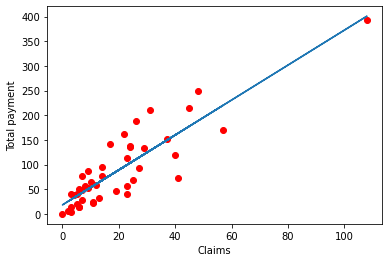

In [17]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, y_pred)
plt.xlabel('Claims')
plt.ylabel('Total payment')
plt.show()

# Predicting the test set values

In [18]:
y_test_pred = regressor.predict(X_test)
y_test_pred

array([120.91587228,  74.89213698,  64.27127498,  89.0532863 ,
       205.88276823,  64.27127498,  50.11012566, 163.39932026,
       230.66477955, 212.9633429 ,  32.408689  ,  71.35184965,
        57.19070032,  32.408689  , 124.45615961,  46.56983833,
       457.24316875,  64.27127498, 234.20506688])

# Visualizing the Test set results

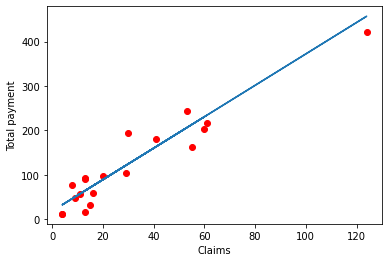

In [19]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_test_pred)
plt.xlabel('Claims')
plt.ylabel('Total payment')
plt.show()

# Making a single prediction

In [20]:
print(regressor.predict([[50.5]]))

[197.03204991]


# MSE: using the defined function mse()

In [21]:
mse(Y_train, y_pred)

1368.1299866465297

# MSE: using scikit learn library

In [22]:
from sklearn.metrics import mean_squared_error
mse_al = mean_squared_error(Y_train, y_pred, squared= True)
mse_al

1368.1299866465297

# Coefficients of Linear Regression

In [23]:
print("Coefficient of linear regression(b1): ", regressor.coef_)
print("Intercept of linear regressor(b0): ", regressor.intercept_)

Coefficient of linear regression(b1):  [3.54028733]
Intercept of linear regressor(b0):  18.247539677213695
